# ML-PROJECT ON PREDICTION OF THE PRICE OF CARS

## Predicting The Price of Car

<img src="istockphoto">

## Table of Contents

1.Problem Description 2.Business Goal 3.Data Preprocessing 4.Data Story.5.Conclusion

## Problem Description:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know: • Which variables are significant in predicting the price of a car • How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

## Business Goal:

We have to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

## Steps in Data Preprocessing

1.Acquire the dataset 2.Importing the libraries 3.Importing the dataset 4.Finding the Missing data 5.Finding and handling outliers 6.Encoding the categorical data 7.Featuring selection 8.Splitting the dataset 9.Feature scaling.

## 1. DATASET:

https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view

## Dataset Desription

The dataset contains 205 rows and 26 columns.The data gives desription about different types of cars,their price and their peculiarities.

## 2.Importing All Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


## 3.Loading The Dataset

In [2]:
# import dataset
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Understanding The Data

In [5]:
#Displays the shape of the data-no.of rows and columns
df.shape

(205, 26)

In [7]:
#Displays the first 5 rows 
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
#Displays the dtype of the data and shows if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**DATASET OVERVIEW:** .205 rows(entries) .26 columns(features -.Mix of integers(8),float64(8),object(10) data types.

In [11]:
#Display the features of the dataset
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 4.Finding and Handling the Missing Values

In [15]:
#displays the  no.of null values(if there) in each columns
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

After checking the missing values in the dataset, it shows there are no missing values. As no null values, dropna()is not used.

##  Handling Duplicates

In [17]:
df.duplicated().sum()

0

There are no duplicates in the dataset, so drop_duplicates is not used.

### Exploring The Data

In [19]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [21]:
#Displays the names of Cars and its number
df['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

** From the above data we can infer that the car name comprises of two parts i.e; the car company and the car model**

In [23]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

**The fueltypes are of two types i.e;gas and diesel**

In [25]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [27]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [29]:
#replace the text values with numbers
df['doornumber'].replace('two',2,inplace=True)
df['doornumber'].replace('four',4,inplace=True)
df['doornumber'].unique()

array([2, 4], dtype=int64)

In [31]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

**Five types of car boby are there.They are convertible,hatchback,sedan, wagon and hardtop.**

In [33]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [35]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [37]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [39]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [41]:
#replace the text values with numbers
df['cylindernumber'].replace('four',4,inplace=True)
df['cylindernumber'].replace('six',6,inplace=True)
df['cylindernumber'].replace('five',5,inplace=True)
df['cylindernumber'].replace('three',3,inplace=True)
df['cylindernumber'].replace('twelve',12,inplace=True)
df['cylindernumber'].replace('two',2,inplace=True)
df['cylindernumber'].replace('eight',8,inplace=True)
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [43]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [45]:
df['enginesize'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

In [47]:
df['boreratio'].unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08, 3.33, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.7 , 3.61, 3.94, 3.74,
       2.54, 3.05, 3.27, 3.24, 3.01])

In [49]:
df['stroke'].unique()

array([2.68 , 3.47 , 3.4  , 2.8  , 3.19 , 3.39 , 3.03 , 3.11 , 3.23 ,
       3.46 , 3.9  , 3.41 , 3.07 , 3.58 , 4.17 , 2.76 , 3.15 , 3.255,
       3.16 , 3.64 , 3.1  , 3.35 , 3.12 , 3.86 , 3.29 , 3.27 , 3.52 ,
       2.19 , 3.21 , 2.9  , 2.07 , 2.36 , 2.64 , 3.08 , 3.5  , 3.54 ,
       2.87 ])

In [51]:
df['compressionratio'].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [53]:
df['horsepower'].unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288,  73,  82,  94,  62,  56, 112,  92, 161,
       156,  52,  85, 114, 162, 134, 106], dtype=int64)

In [55]:
df['price'].unique()

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

## 5.Finding And Handling Outliers

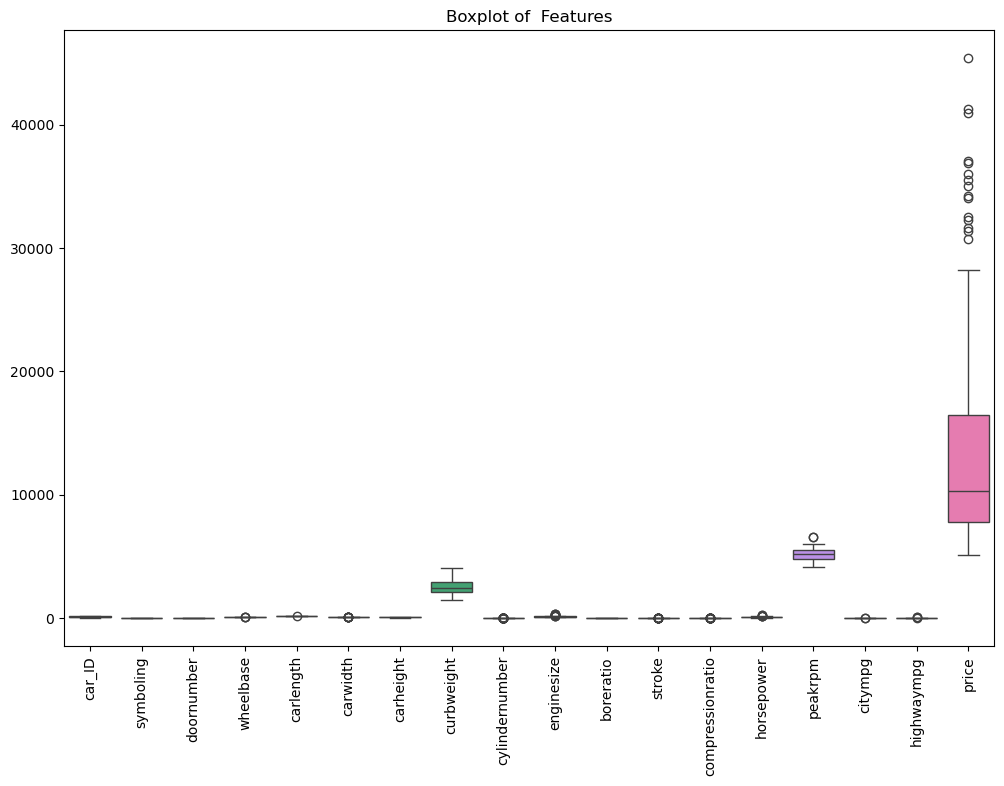

In [57]:
#boxplot to detect potential outliers in  data
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

**There are outliers in the columns like wheelbase,carlength,carwidth,cylindernumber,enginesize,stroke,compressionratio,horsepower,citympg,
highwaympg,and price.**

**create histograms and boxplot**

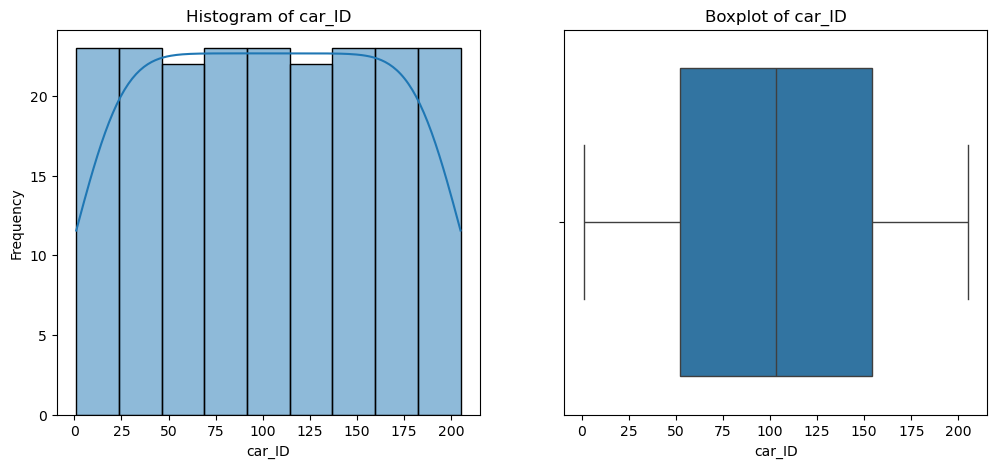

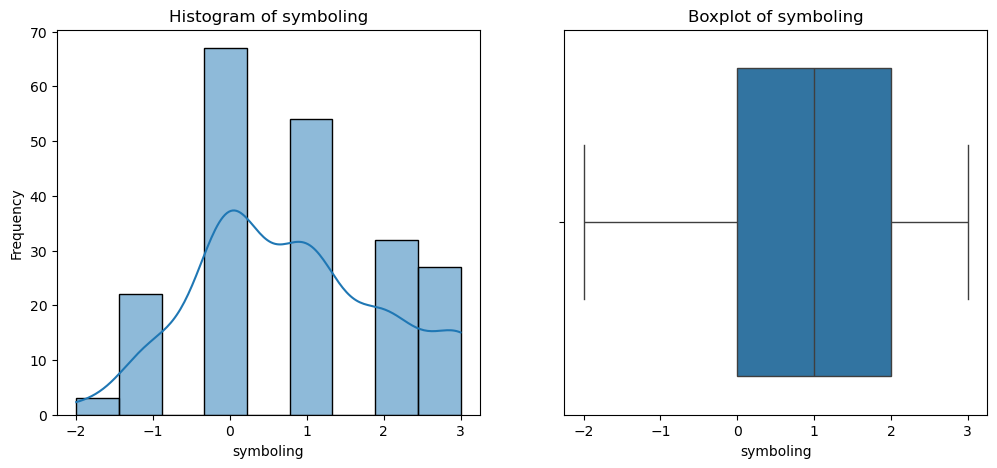

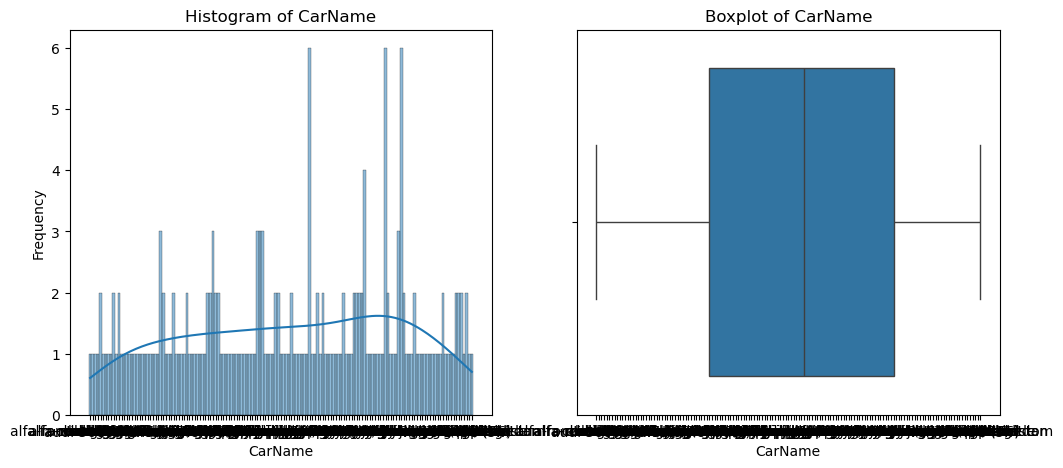

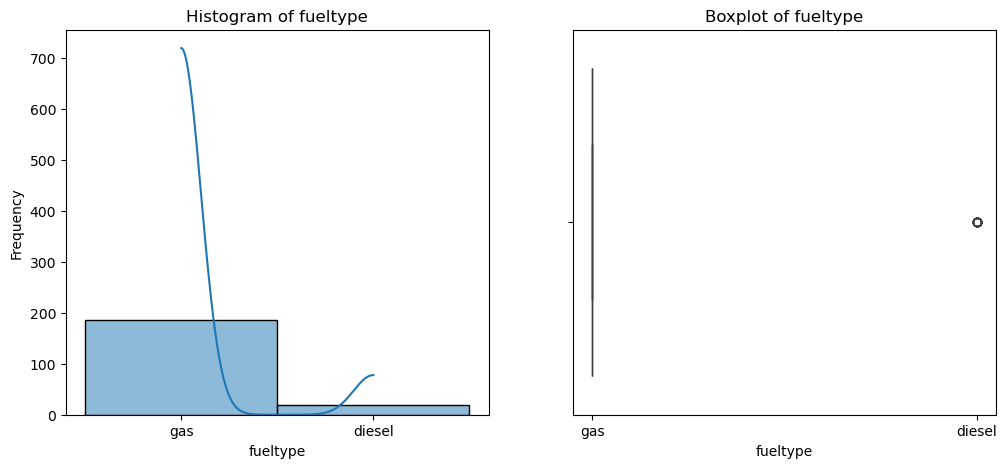

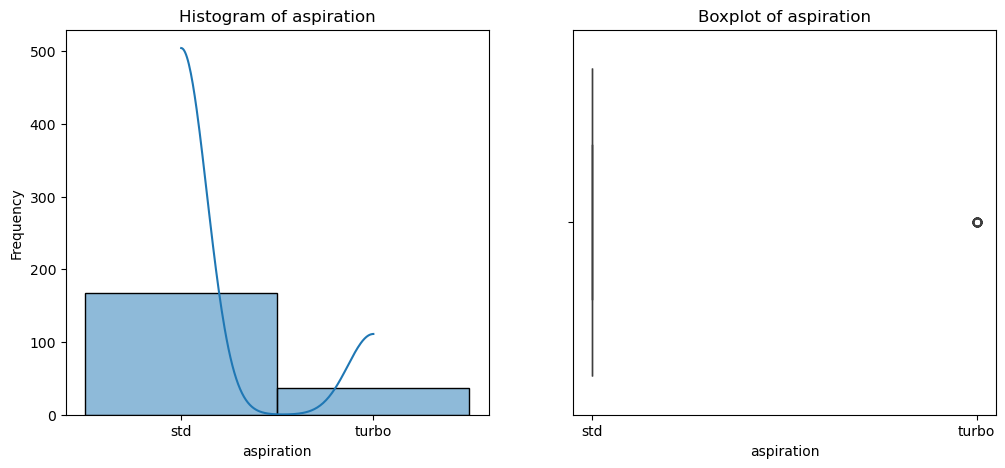

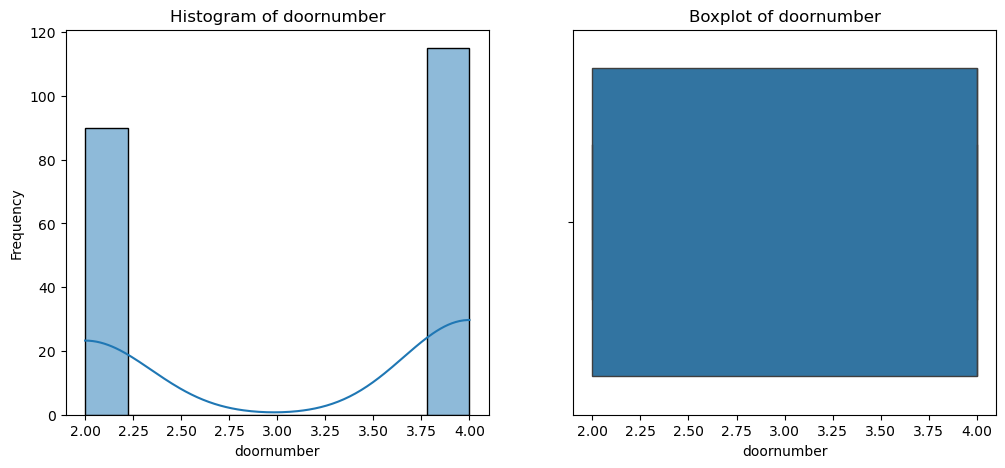

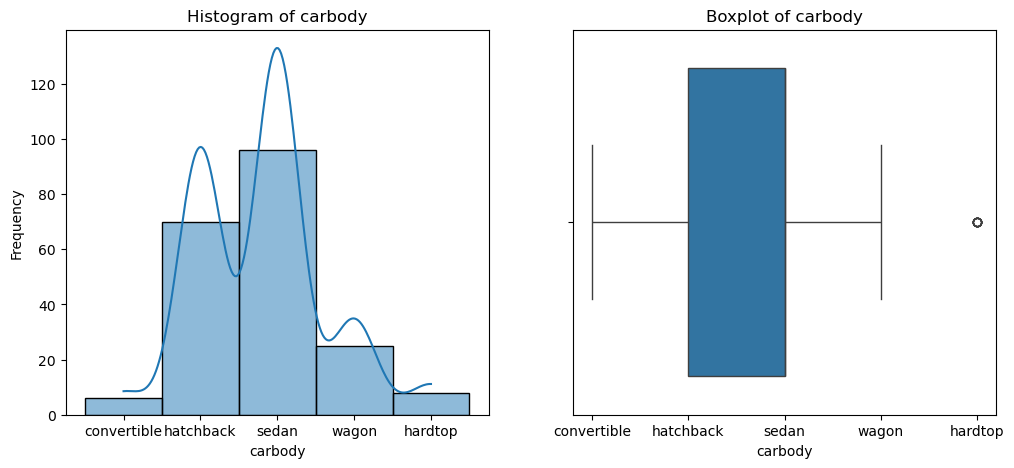

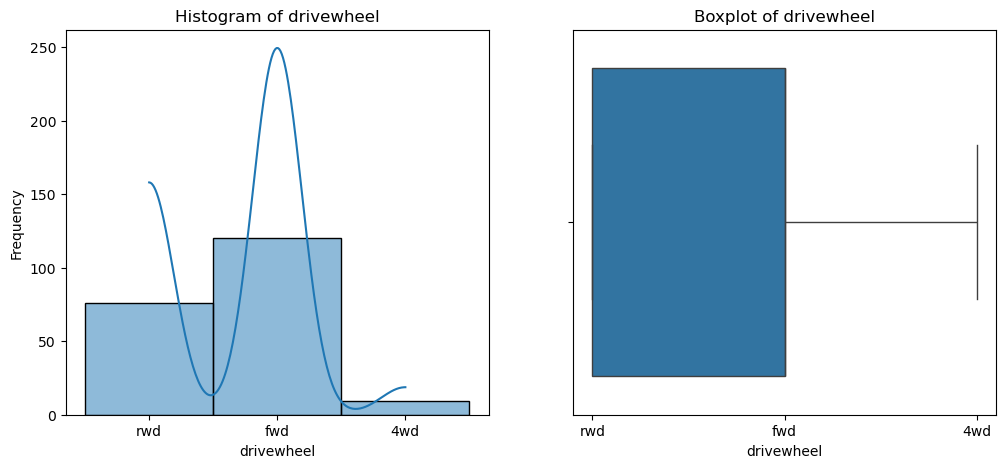

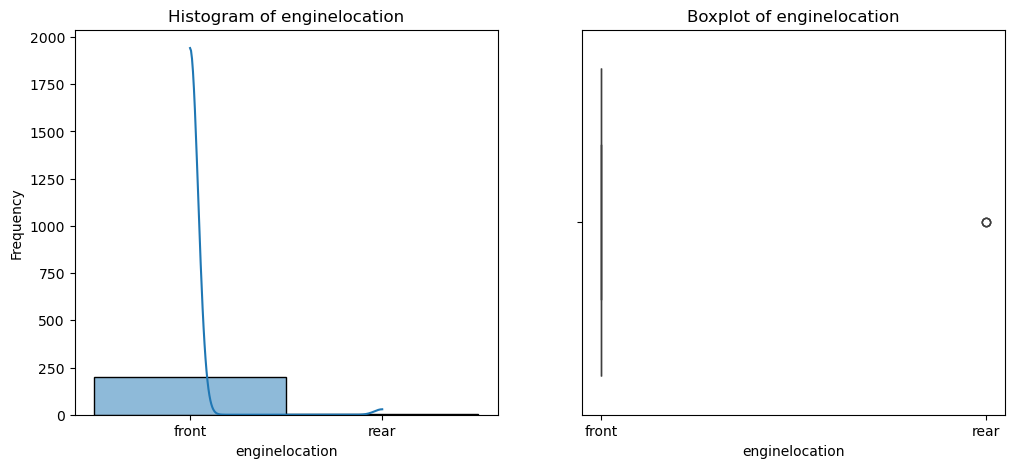

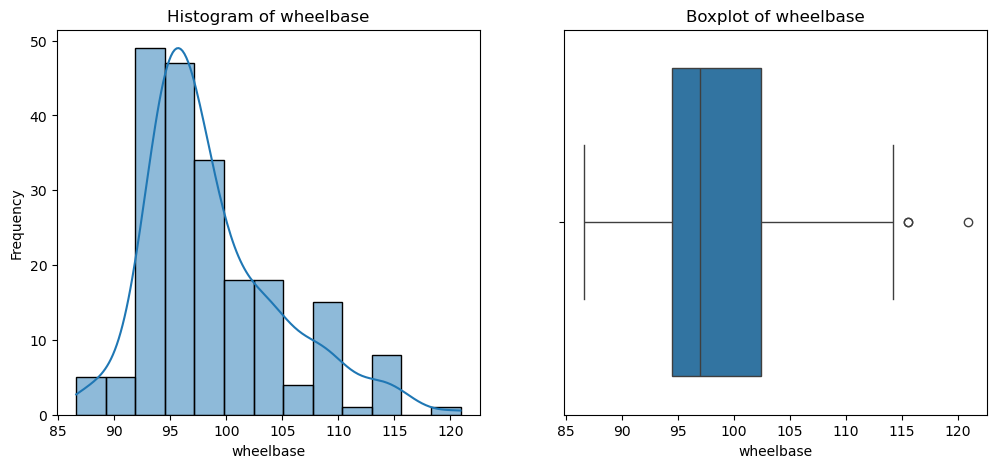

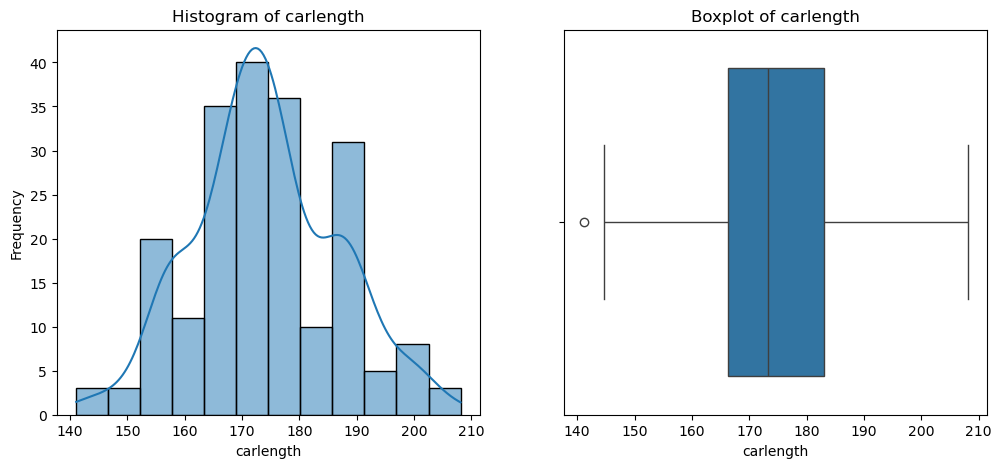

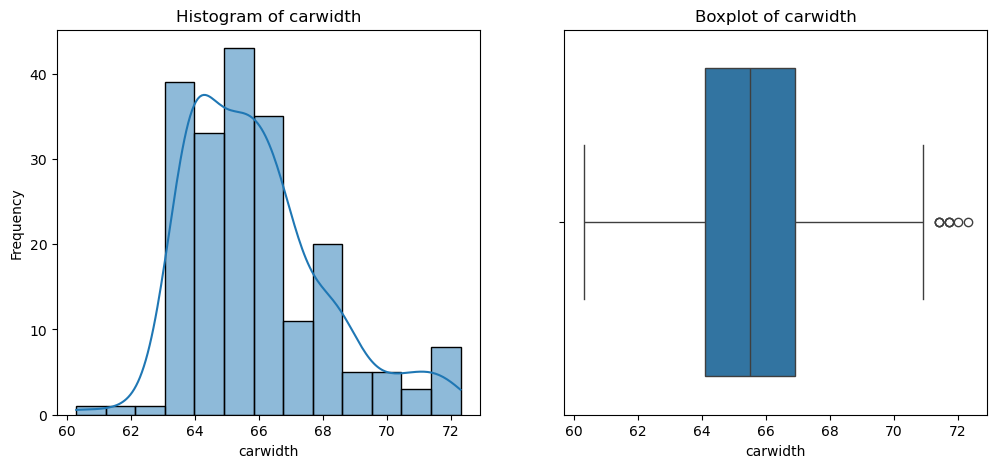

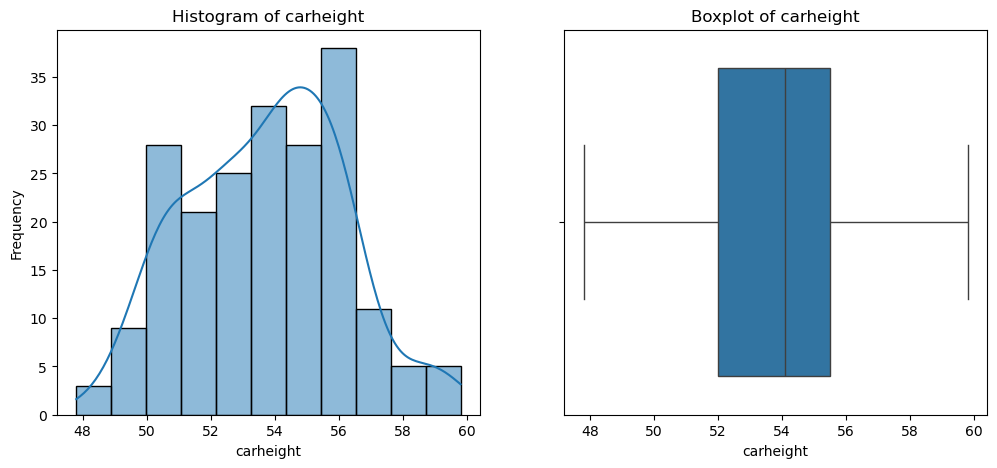

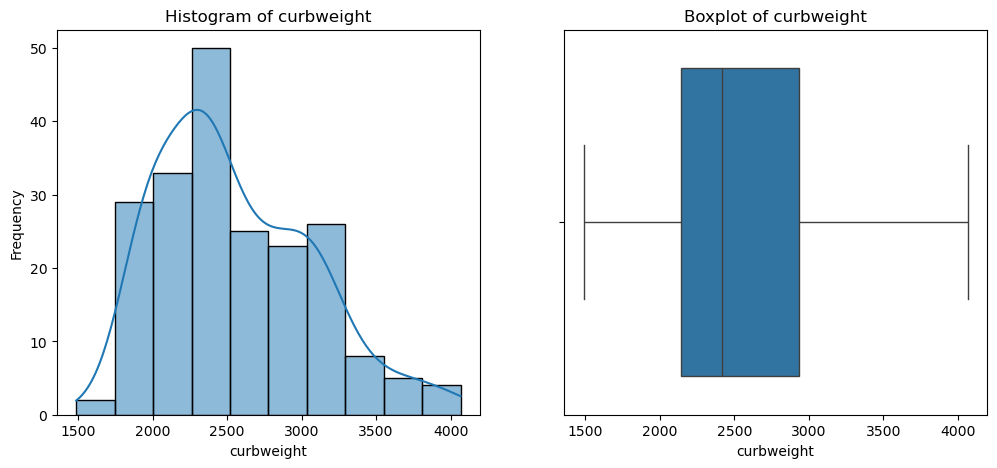

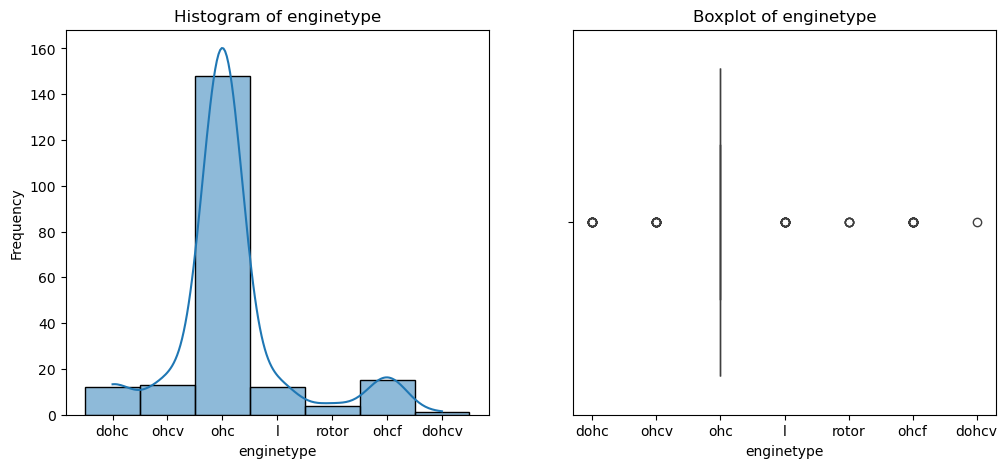

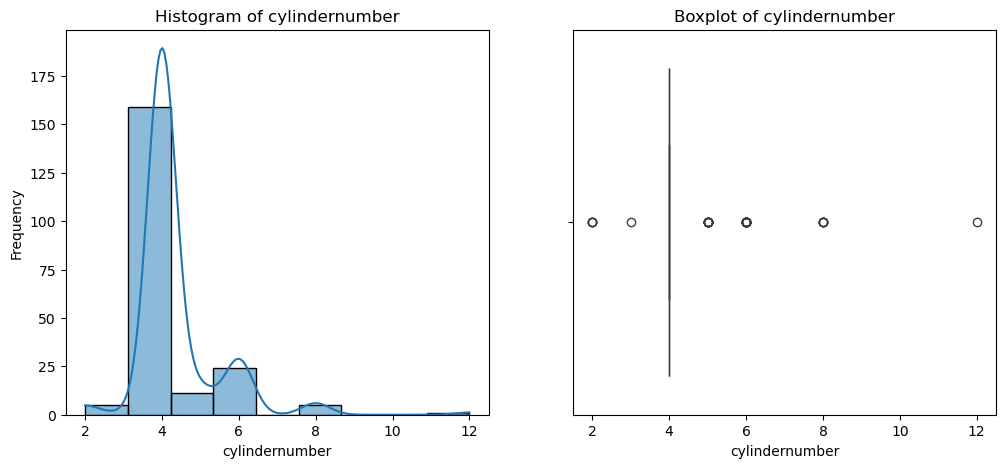

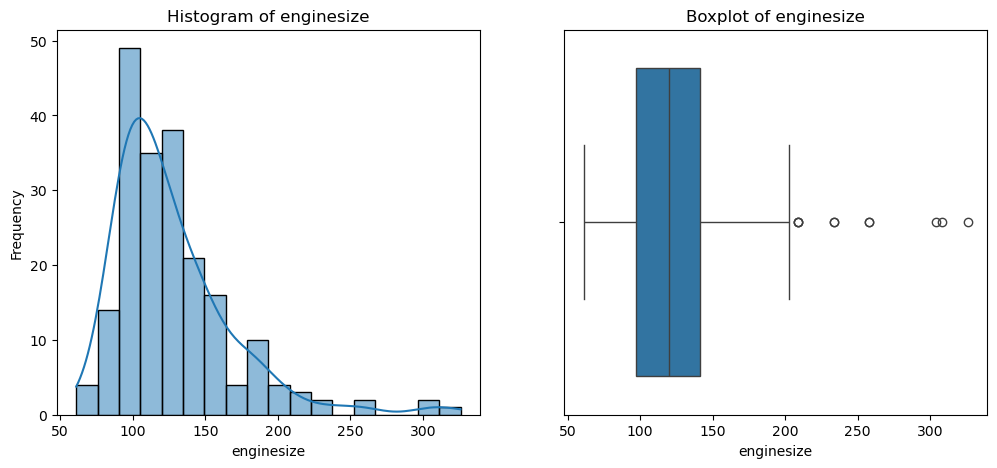

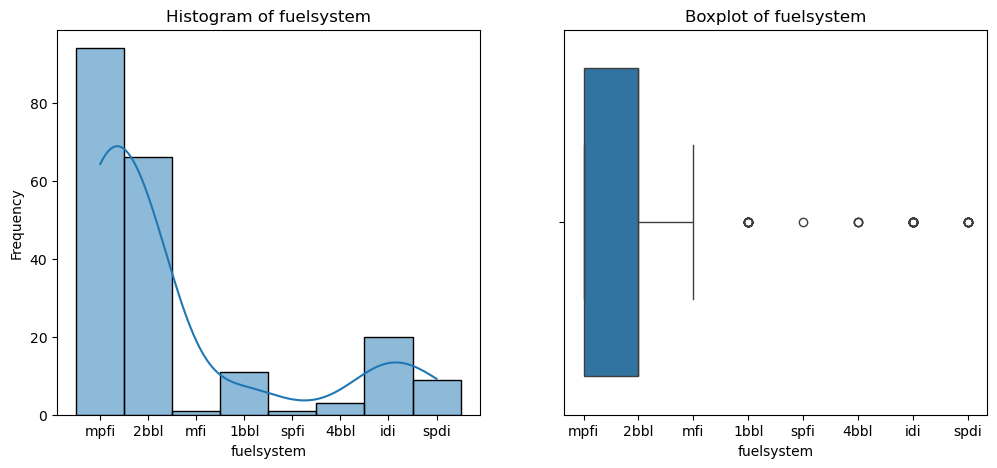

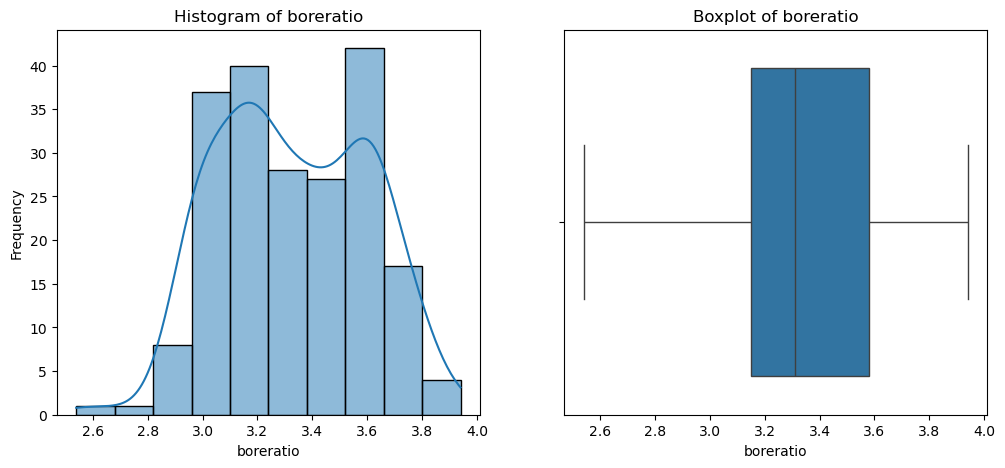

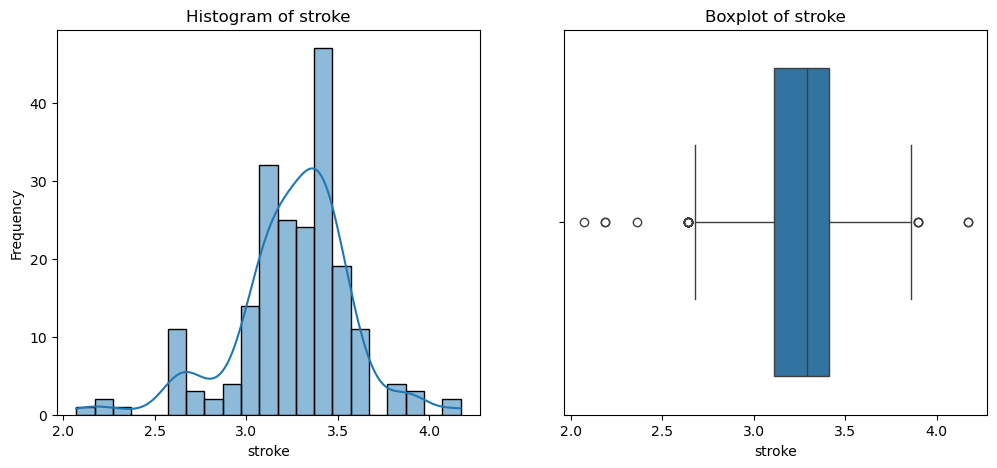

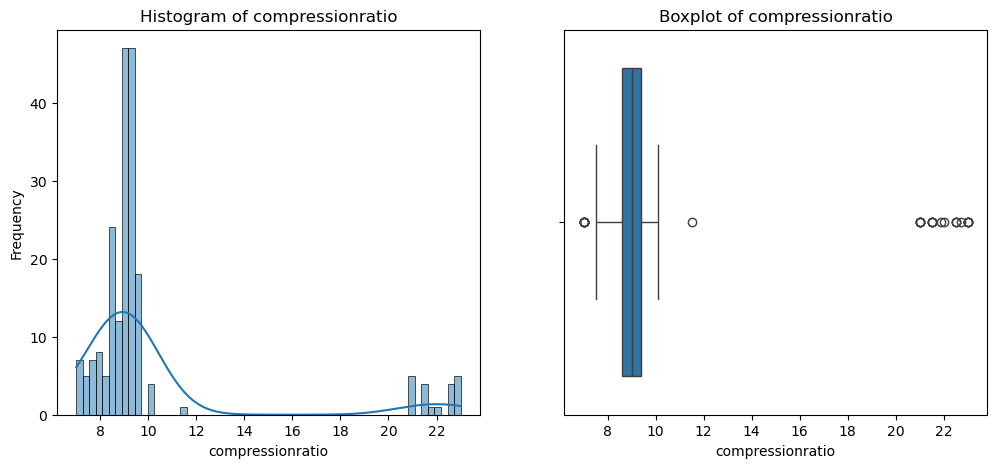

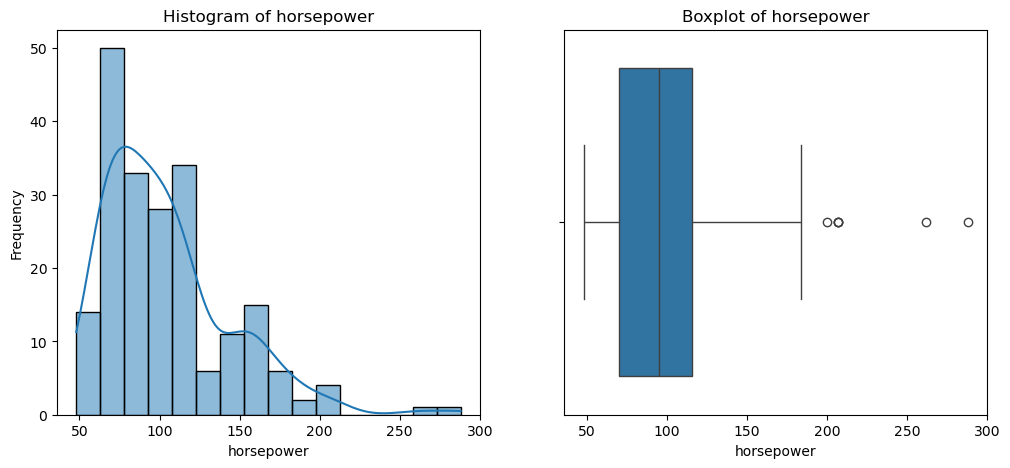

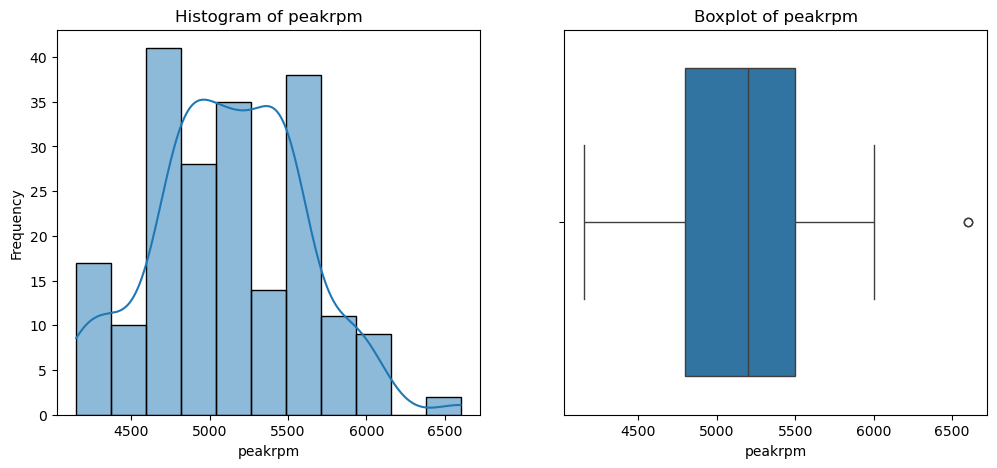

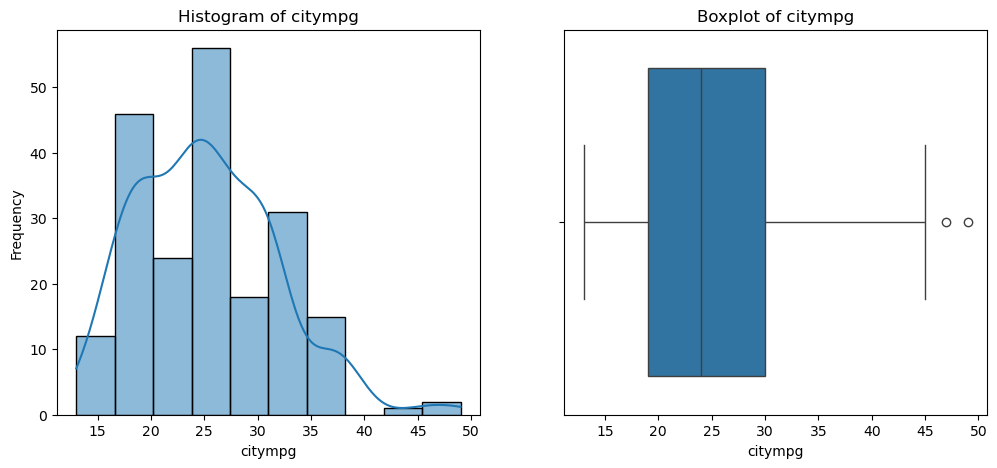

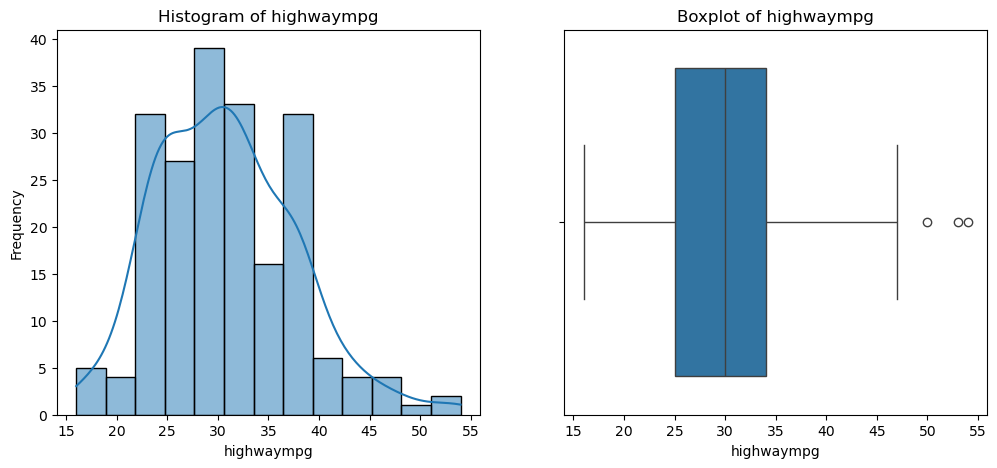

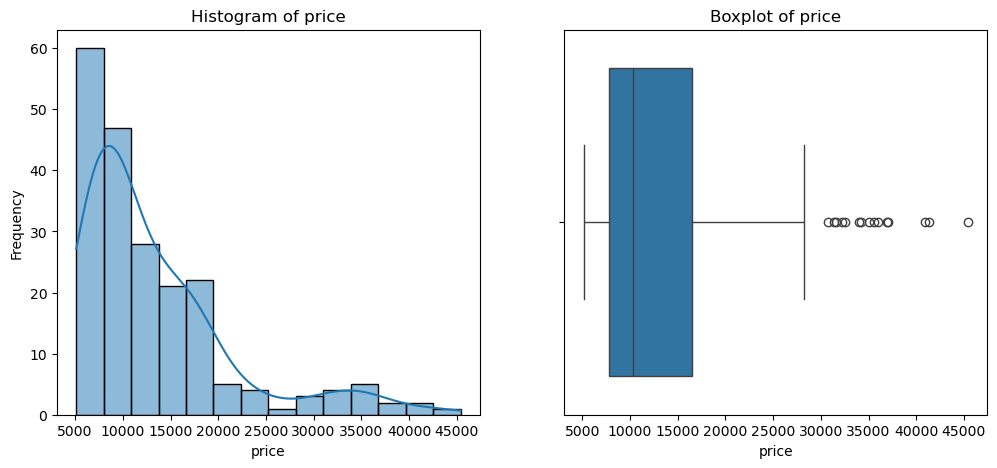

In [61]:
for i in df.columns:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[i], kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {i}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')

    plt.show()

The Histograms reveals that Price is leftskewed,highwaympg is moderately skewed,citympg and peakrpm are slightly skewed,horsepower and enginesize are left skewed.


### Handling Outliers

In [63]:
df1=df.copy()
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [65]:
#IQR method for outlier removal
def remove_outliers(df1,columns):
  data_filtered=df1.copy()

  for column in columns:
     Q1 = df1[column].quantile(0.25)
     Q3 = df1[column].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5* IQR

     data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

  return data_filtered


In [67]:
new_df1=remove_outliers(df1,['wheelbase','carlength','carwidth','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower',
                             'peakrpm','citympg','highwaympg','price'])

Removed outliers from'wheelbase','carlength','carwidth','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower',
'peakrpm','citympg','highwaympg',and'price'using remove_outliers() function.

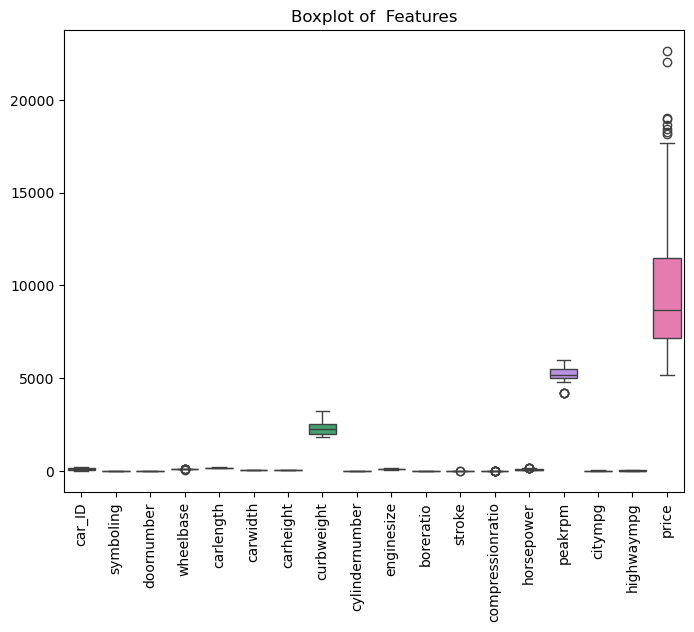

In [69]:
# Visualization of outliers after removing outliers of different features using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(new_df1)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

Here we can see still some outliers are present even after removing the outliers from some features.

## 6.Encoding The Categorical Data

In [71]:
#Encoding using Label Encoder
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

In [73]:
label.fit(df1.fueltype)
df1.fueltype=label.transform(df1.fueltype)

In [75]:
label.fit(df1.aspiration)
df1.aspiration=label.transform(df1.aspiration)

In [77]:
label.fit(df1.carbody)
df1.carbody=label.transform(df1.carbody)


In [79]:
label.fit(df1.drivewheel)
df1.drivewheel=label.transform(df1.drivewheel)

In [81]:
label.fit(df1.enginelocation)
df1.enginelocation=label.transform(df1.enginelocation)

In [83]:
label.fit(df1.enginetype)
df1.enginetype=label.transform(df1.enginetype)

In [85]:
label.fit(df1.fuelsystem)
df1.fuelsystem=label.transform(df1.fuelsystem)

## 7.Feature Selection

Removing the irrelevant columns 

In [87]:
df1 = df1.drop(['car_ID'], axis =1)

In [89]:
df1.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    int32  
 3   aspiration        205 non-null    int32  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int32  
 6   drivewheel        205 non-null    int32  
 7   enginelocation    205 non-null    int32  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int32  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int32  
 1

In [93]:
df1['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

** From the above data we can infer that the car name comprises of two parts i.e; the car company and the car model.**

In [95]:
df1['car_company'] = df1['CarName'].apply(lambda x:x.split(' ')[0])

In [97]:
df1 = df1.drop(['CarName'], axis =1)

In [99]:
df1['car_company'].value_counts()

car_company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

**From the above data we can see that some of car_company names has been misspelled. Hence we need to fix it.**

In [101]:
df1['car_company'].replace('toyouta', 'toyota',inplace=True)
df1['car_company'].replace('Nissan', 'nissan',inplace=True)
df1['car_company'].replace('maxda', 'mazda',inplace=True)
df1['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
df1['car_company'].replace('vw', 'volkswagen',inplace=True)
df1['car_company'].replace('porcshce', 'porsche',inplace=True)

In [103]:
df1['car_company'].value_counts()

car_company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

### Visualizing The Data

In [105]:
df1['wheelbase'].value_counts().head()

wheelbase
94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: count, dtype: int64

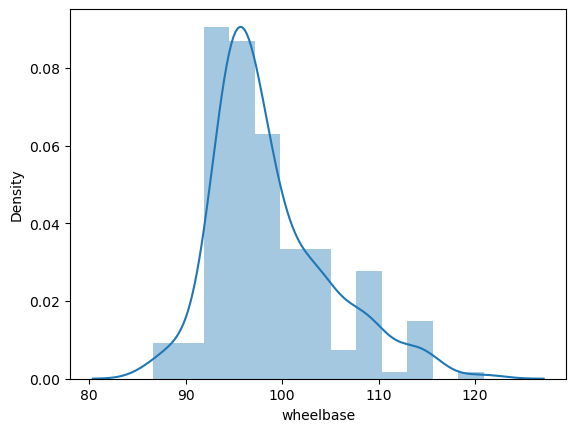

In [107]:
sns.distplot(df1['wheelbase'])
plt.show()

### Visualising Dependent Variable: 'price'

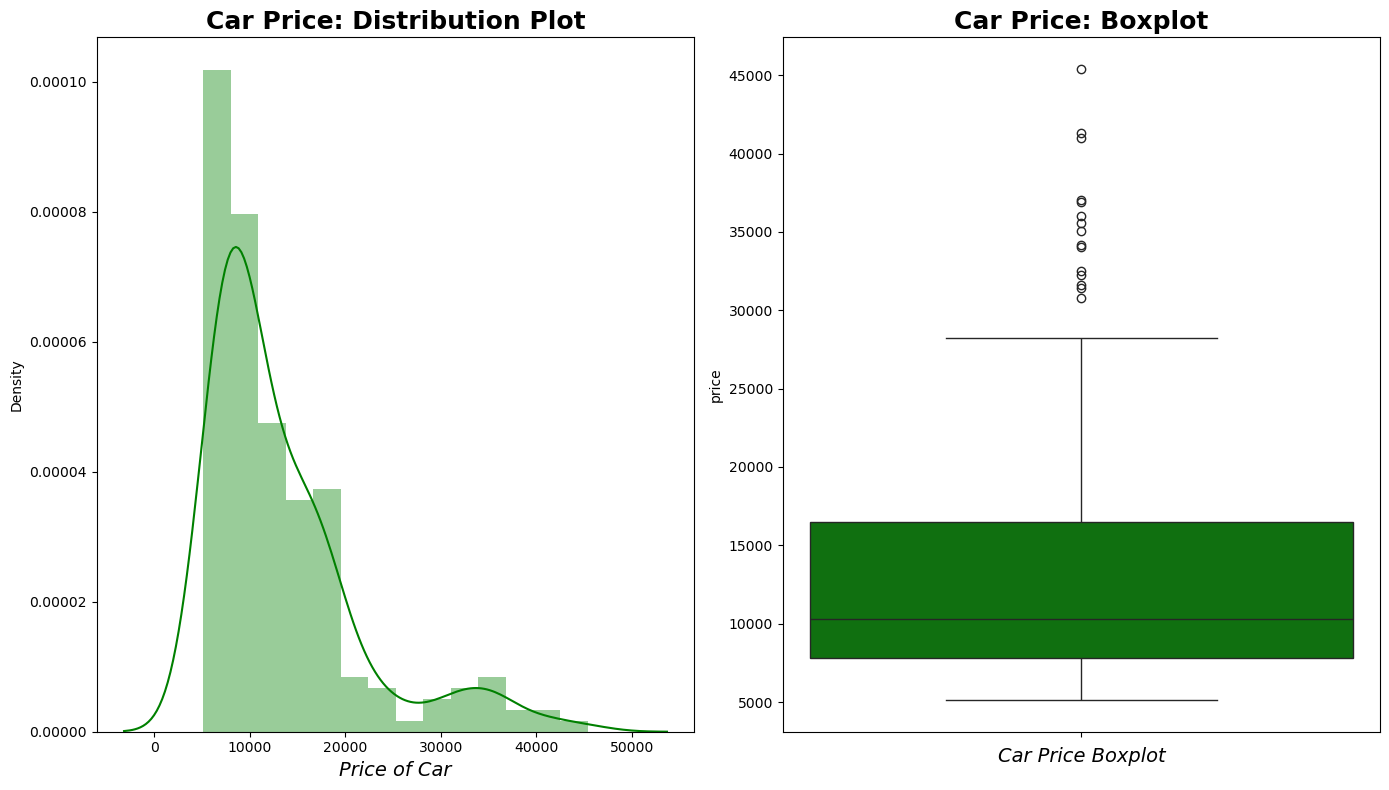

In [111]:
##Visualising our dependent/target variable 'price' data using a distplot and boxplot
plt.figure(figsize=(14,8), dpi=100)

#subplot(121) 
plt.subplot(121)
plt.title('Car Price: Distribution Plot', fontweight='bold', fontsize=18)
sns.distplot(df1['price'], color='g')
plt.xlabel('Price of Car', fontstyle='italic', fontsize=14)

#subplot(122) 
plt.subplot(122)
plt.title('Car Price: Boxplot', fontweight='bold', fontsize=18)
sns.boxplot(y= df1['price'], color='g')
plt.xlabel('Car Price Boxplot', fontstyle='italic', fontsize=14)

plt.tight_layout()
plt.autoscale()
plt.show()

In [113]:
##Checking car 'price' boxplot percentiles (distribution)
round(df1.price.describe(percentiles = [0.25,0.5,0.75,0.80,0.85,0.90,0.95,0.99,1]))

count      205.0
mean     13277.0
std       7989.0
min       5118.0
25%       7788.0
50%      10295.0
75%      16503.0
80%      17494.0
85%      18500.0
90%      22563.0
95%      32472.0
99%      40803.0
100%     45400.0
max      45400.0
Name: price, dtype: float64

**Observation:** (1) The car price distribution plot is left-skewed, meaning that the data set's lower bounds are extremely low relative to the rest of the data. (2) There is a significant difference between the mean (13,277) and median (10,295) values of the car price distribution, which shows sampling fluctuations in the car prices data. (3) From the boxplot and percentile details, we see that 50% of the car prices are below (10,295), 75% of the prices are below (16,503), 85% of the prices are below (18,500), 90% of the prices are below (22,563) and remaining 10% are between (22,563 and 45,400).

In [115]:
#sort the dataset with the necessary features only.
columns_to_sort=['drivewheel','wheelbase','carlength','carwidth',
                 'curbweight','cylindernumber','enginesize','fuelsystem','boreratio','horsepower','citympg','highwaympg']
independent_data_for_model=df1[columns_to_sort]
independent_data_for_model.head()

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,2,88.6,168.8,64.1,2548,4,130,5,3.47,111,21,27
1,2,88.6,168.8,64.1,2548,4,130,5,3.47,111,21,27
2,2,94.5,171.2,65.5,2823,6,152,5,2.68,154,19,26
3,1,99.8,176.6,66.2,2337,4,109,5,3.19,102,24,30
4,0,99.4,176.6,66.4,2824,5,136,5,3.19,115,18,22


In [117]:
##numeric variables
numeric_vars = df1.select_dtypes(include=['int64','float64']).columns
numeric_vars

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

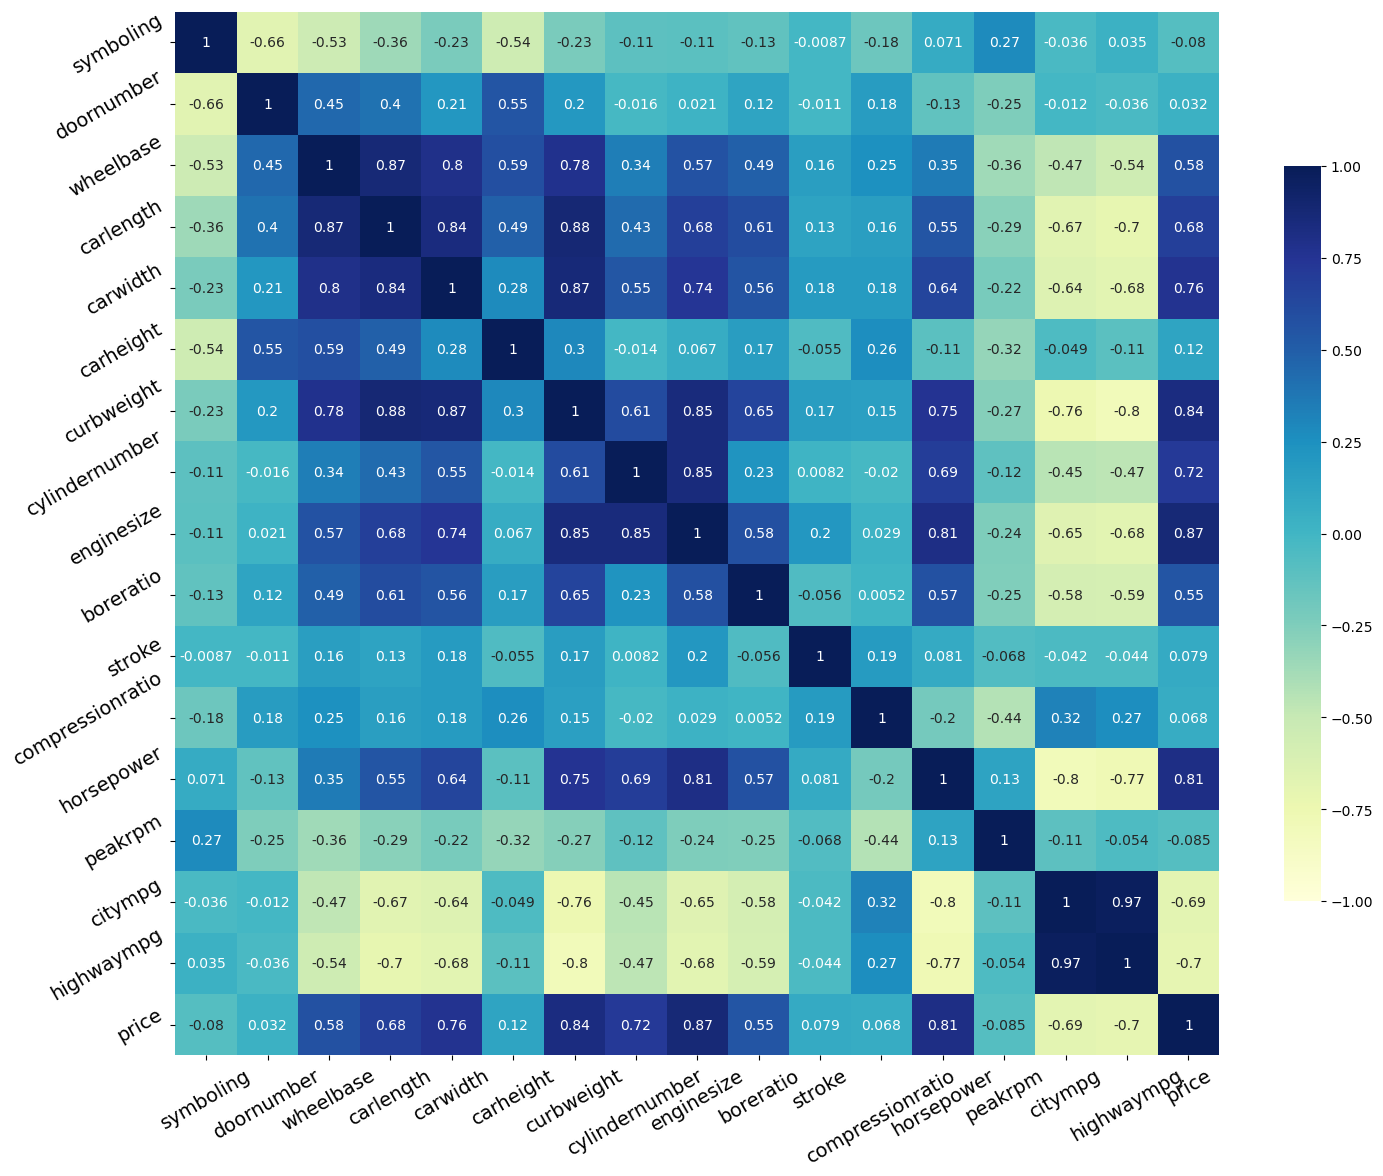

In [119]:
#Plotting a heatmap to understand correlation amongst continuous/numeric variables

plt.figure(figsize = (12,8), dpi=100)
corr_matrix_new =df1[numeric_vars].corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True)
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14, rotation=30)
plt.tight_layout()
plt.autoscale()
plt.show()

**From the above plot we can infer the following data:
Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.
Price is negatively correlated to symboling, citympg and highwaympg.
Also the cars having high mileage may fall in the 'economy' cars category, and are priced lower.
There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correla**ted.

## 8.Splitting The Dataset

In [121]:
X = df1.drop('price', axis=1)  # Features
y = df1['price']  # Target variable

# Encode categorical features, etc.
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)                                                  

(164, 45) (41, 45) (164,) (41,)


## 9.Feature Scaling

In [123]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.72738032, -3.15171911, -0.46348119, ..., -0.42409446,
        -0.2548236 , -0.22645541],
       [-0.72738032,  0.31728716, -0.46348119, ..., -0.42409446,
        -0.2548236 , -0.22645541],
       [-0.72738032,  0.31728716, -0.46348119, ...,  2.35796522,
        -0.2548236 , -0.22645541],
       ...,
       [ 0.07863571,  0.31728716, -0.46348119, ..., -0.42409446,
        -0.2548236 , -0.22645541],
       [ 1.69066776,  0.31728716, -0.46348119, ...,  2.35796522,
        -0.2548236 , -0.22645541],
       [-0.72738032,  0.31728716, -0.46348119, ..., -0.42409446,
        -0.2548236 , -0.22645541]])

In [125]:
print(X_train_scaled.shape,X_train.shape)

(164, 45) (164, 45)


**## 2. Model Implementat**ion 
•	 Impleedment the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor



In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector': SVR()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                            MSE          MAE  R-squared
Linear Regression  9.588641e+06  2025.400948   0.878539
Decision Tree      7.740741e+06  1894.898366   0.901946
Random Forest      3.294024e+06  1229.899423   0.958274
Gradient Boosting  5.817594e+06  1684.254141   0.926307
Support Vector     8.699423e+07  5707.109785  -0.101974


**Analysis of Results** R-squared: The Random Forest Regressor has the highest R-squared value, indicating it explains the most variance in the price data. MSE: Again, the Random Forest Regressor shows the lowest MSE, suggesting it has the smallest prediction errors on average. MAE: Random Forest also has the lowest MAE, confirming that its average predicted price is closest to the actual prices.
**Best Performing Model** Best Model: Random Forest Regressor .

**Justification:**

It outperformed other models in all metrics (R-squared, MSE, MAE). Random Forest is an ensemble learning method that effectively captures complex patterns and interactions in the data, reducing both overfitting and underfitting compared to single models like Decision Trees and Linear Regression. It handles the high dimensionality and mixed feature types (numerical and categorical) more effectively than other methods.

### Car Company Analysis

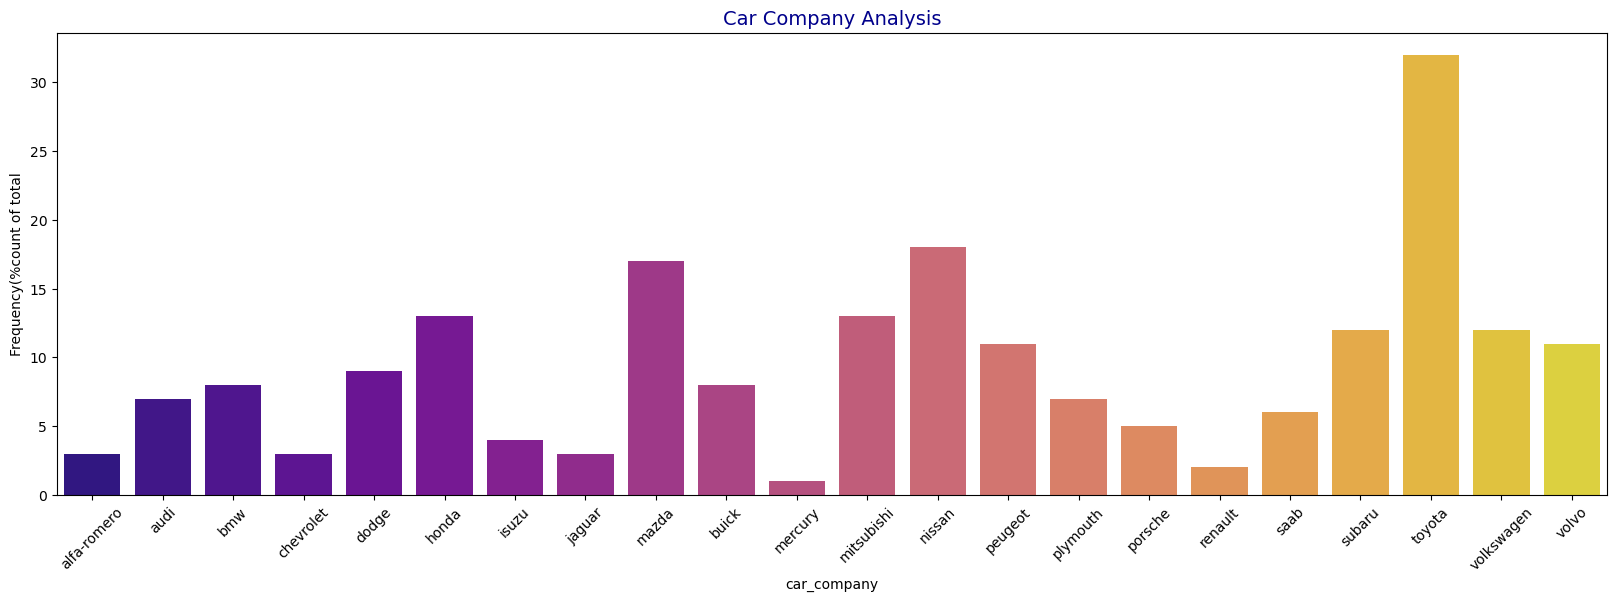

In [137]:
# Create the plot
import seaborn as sns

plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.xlabel('car_company')
plt.ylabel('Frequency(%count of total')
sns.countplot(x ='car_company',data = df1,hue = 'car_company',palette = 'plasma')
plt.title('Car Company Analysis',fontsize=14, color="darkblue")
plt.show()

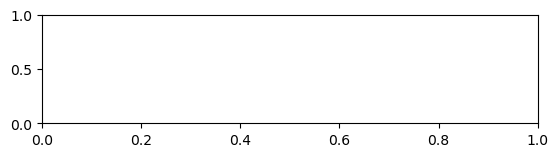

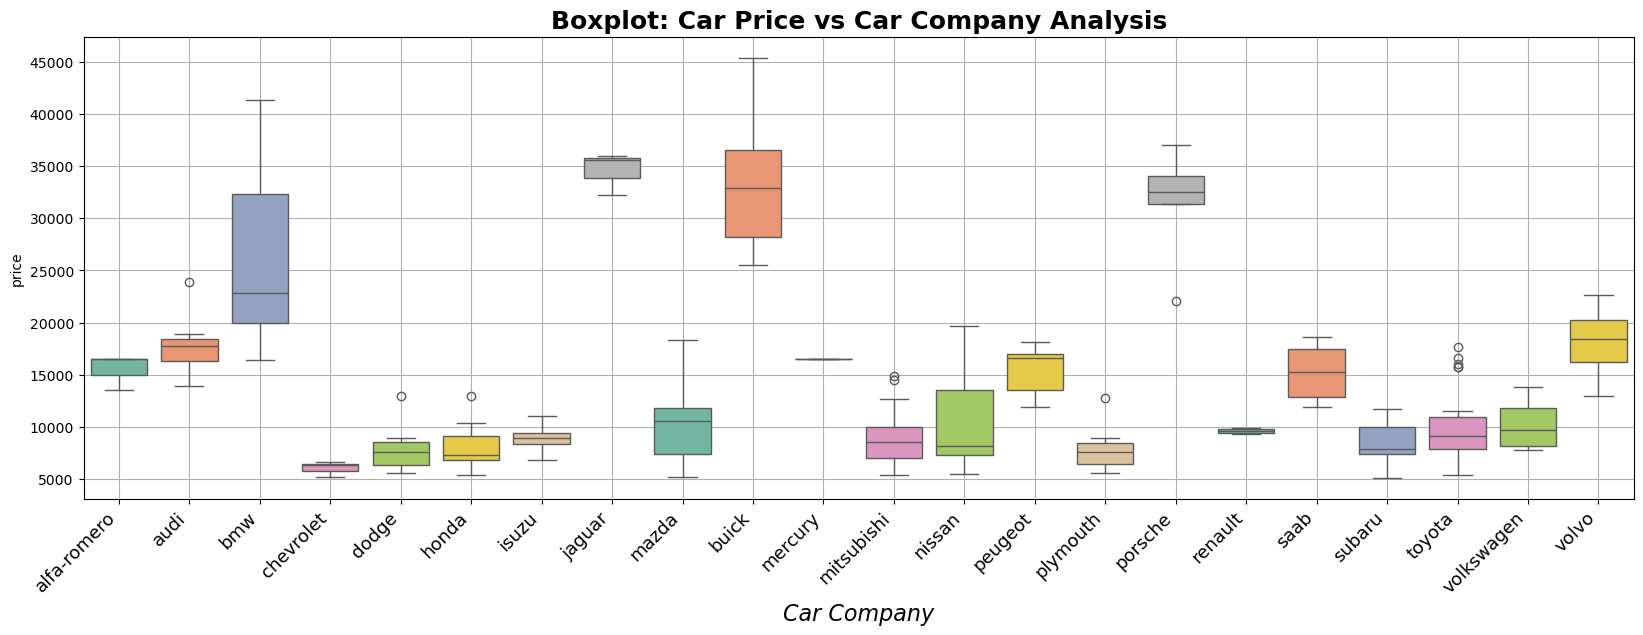

In [139]:
#Boxplot car company name type and car price
plt.subplot(312)
plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
ax_RN = sns.boxplot(x=df1.car_company, y=df1.price, palette=("Set2"))
plt.title('Boxplot: Car Price vs Car Company Analysis', fontsize=18, fontweight='bold')
plt.xlabel('Car Company', fontsize= 16, fontstyle='italic')
plt.setp(ax_RN.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(fontsize=13)
plt.grid(True)


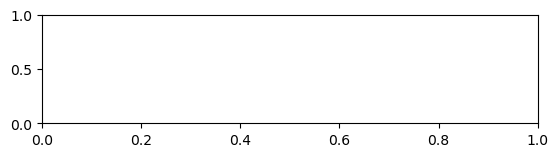

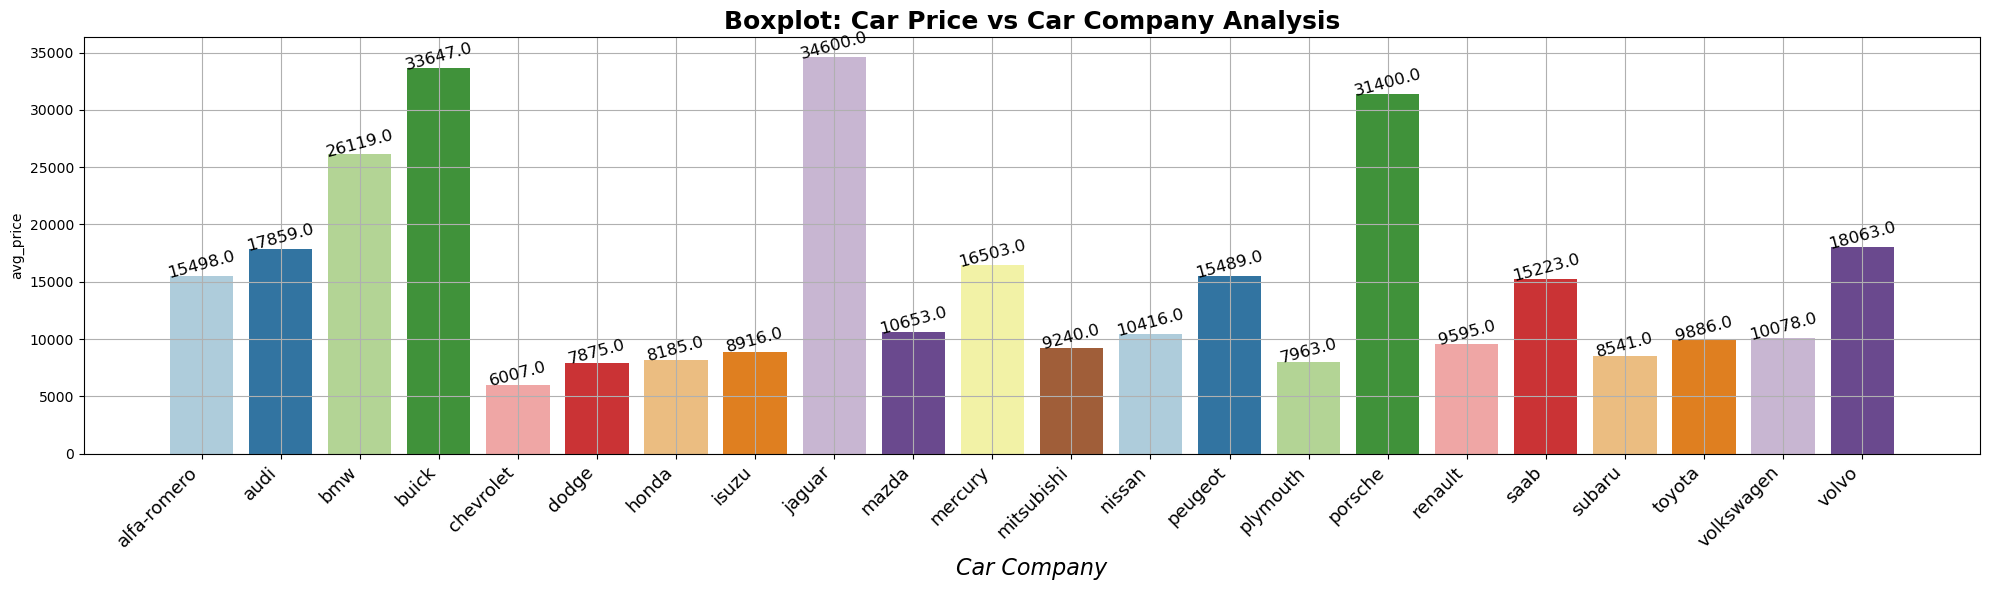

In [141]:
#Barplot Average Price based on car company name
plt.subplot(313)
plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
avg1 = pd.DataFrame(df1.groupby('car_company')['price'].mean().round().to_frame('avg_price'))
avg1.reset_index(inplace=True)
ax_12 = sns.barplot(x='car_company',y='avg_price', data=avg1, palette= 'Paired')
plt.title('Boxplot: Car Price vs Car Company Analysis', fontsize=18, fontweight='bold')
plt.xlabel('Car Company', fontsize= 16, fontstyle='italic')
plt.setp(ax_12.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(fontsize=13)
ax_12.set(ylim=(0, 40000))
for i in ax_12.patches:
    ax_12.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0,8), textcoords = 'offset points', fontsize=12, rotation=15)
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

**Observation:** Toyota is the most preferred car company, followed by Nissan. Car companies viz. Jaguar and Buick have the highest average car prices i.e (34,600) and (33,647) respectively.

## Hyperparameter tuning

Hyperparameter tuning is to improve the model's performance: Better settings can lead to more accurate predictions. It is the process of adjusting settings in a machine learning model to make it work better.

In [131]:
from sklearn.model_selection import  GridSearchCV

In [133]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

y_train_df = pd.DataFrame(y_train) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_train_df)
y_train_scaled = scaler.transform(y_train_df)

# Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr_params = {'max_depth': [None, 10, 15, 20], 'min_samples_split': [2, 5, 10]}
dtr_grid = GridSearchCV(dtr, dtr_params, cv=5, error_score='raise')
dtr_grid.fit(X_train_scaled, y_train_scaled)

# Random Forest Regressor Model
rf = RandomForestRegressor()
rf_params = {'n_estimators': [100, 150, 200], 'max_depth': [None, 5, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, error_score='raise')
rf_grid.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 150, 200]})

In [145]:
# Re-evaluate_model and return the metrics
#using train data
def evaluate_model(model, X_train_scaled, y_train_scaled):
    y_pred_train = model.predict(X_train_scaled)
    mae=mean_absolute_error(y_train_scaled,y_pred_train)
    mse=mean_squared_error(y_train_scaled,y_pred_train)
    rmse=np.sqrt(mse)
    r2=r2_score(y_train_scaled,y_pred_train)
    return r2, mse, mae, rmse # Return the metrics

# Store results
dtr_results = evaluate_model(dtr_grid,  X_train_scaled, y_train_scaled)
rf_results = evaluate_model(rf_grid, X_train_scaled, y_train_scaled)

results_df = pd.DataFrame([dtr_results, rf_results],
                             index=['Decision Tree', 'Random Forest'],
                             columns=['R-squared', 'Mean Squared Error', 'Mean Absolute Error','RMSE'])

display(results_df)

,R-squared,Mean Squared Error,Mean Absolute Error,RMSE
Decision Tree,0.975075,0.024925,0.107018,0.157878
Random Forest,0.985543,0.014457,0.079081,0.120235


Value of MSE is near to 0 for the best model.
R2 value is 0 to 1 for the best model.
Here both the values are matching with Random Forest Regressor.

## CONCLUSION

**Toyota is the most preferred car company.Price of the car is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.The cars having high mileage may fall in the 'economy' cars category, and are priced lower.**